
Loading MNIST Data...

Loading Training Data...

Loading Testing Data...

Preparing Classifier Training and Validation Data...

Logistic Regression Classifier

Pickling the Classifier for Future Use...


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

Logistic Regression Trained Classifier Confidence:  0.9128333333333334

Predicted Values:  [8 6 7 ... 4 1 4]

Accuracy of Classifier on Validation Image Data:  0.9128333333333334

Confusion Matrix: 
 [[582   0   5   1   2   4   7   1   8   4]
 [  0 641   4   2   1   3   1   1   7   2]
 [  6   6 514  15   9   3   9   5  21   3]
 [  3   3  15 541   2  12   2   8  12   5]
 [  0   2   6   2 542   0  16   1   4  20]
 [  6   1   7  23   8 456  10   2  13   8]
 [  5   5   3   0   3   9 571   0   4   0]
 [  4   5   9   6   7   0   1 574   3  14]
 [  5  11   5  17   3  12   5   2 498   5]
 [  1   3   2   5  19   2   0  22   5 558]]


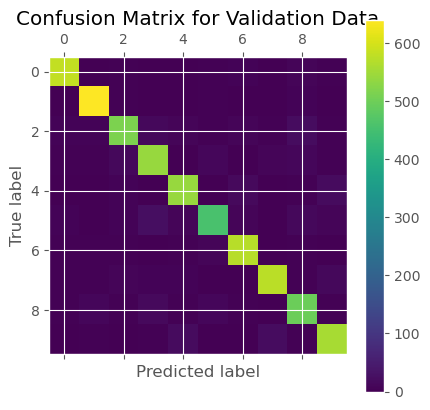


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9179

Confusion Matrix for Test Data: 
 [[ 955    0    4    1    2    5    7    3    3    0]
 [   0 1109    7    2    0    1    3    2   11    0]
 [   7   14  914   17   11    4   15    9   37    4]
 [   4    2   19  915    2   23    2   13   23    7]
 [   2    2    3    6  913    0   10    6    9   31]
 [  14    5    2   37   11  757   16    7   36    7]
 [  10    3   11    2    6   20  901    1    4    0]
 [   2    6   24   13    7    1    0  940    3   32]
 [   8   13    6   23    6   24    9   13  858   14]
 [   7    8    2   10   23    8    0   23   11  917]]


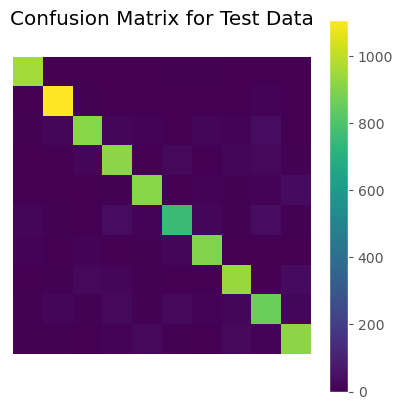

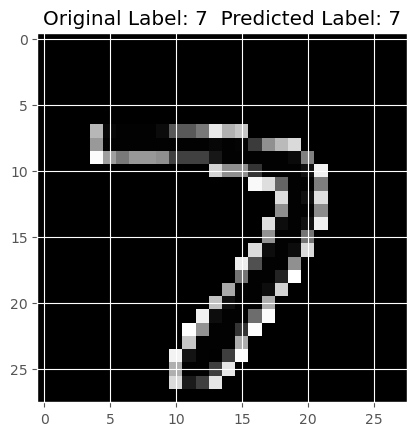

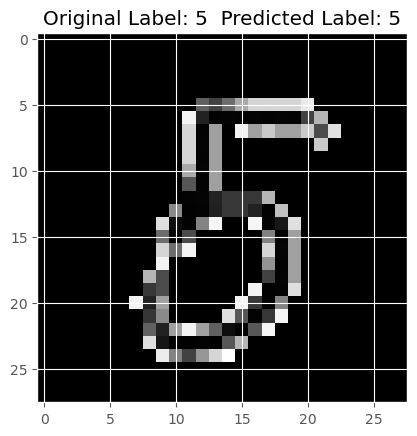

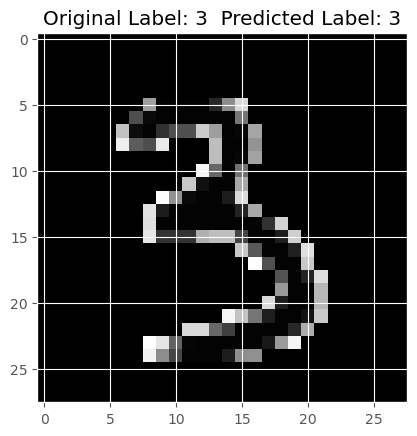

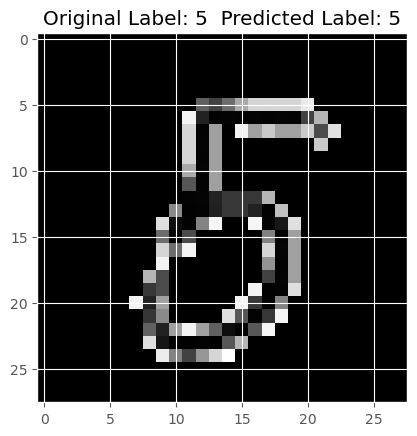

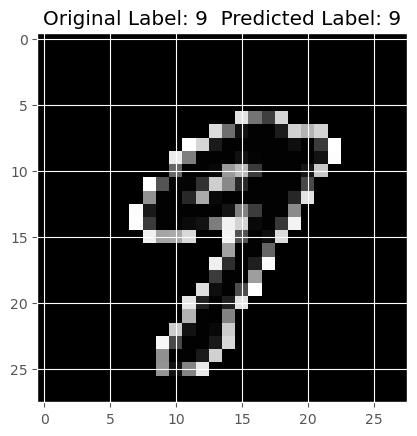

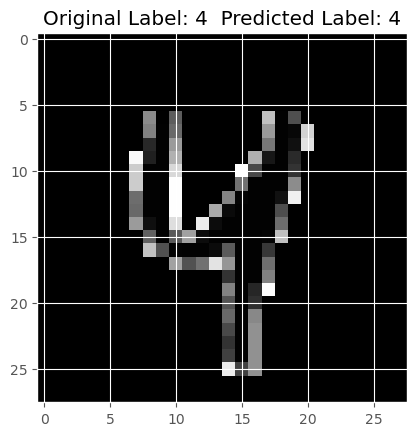

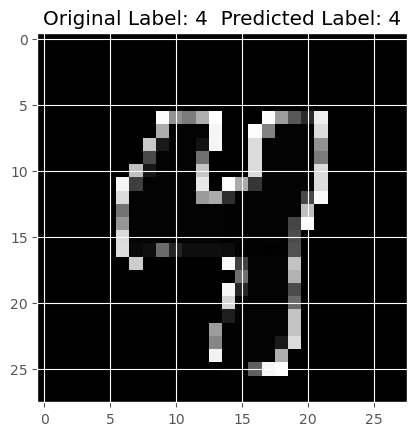

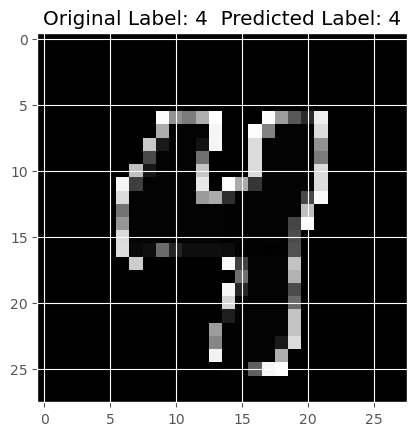

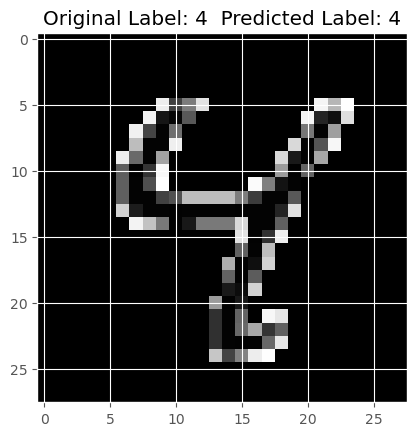

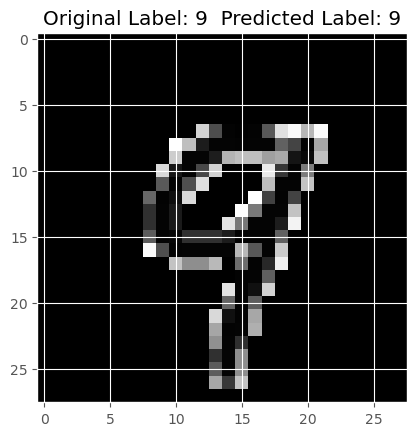

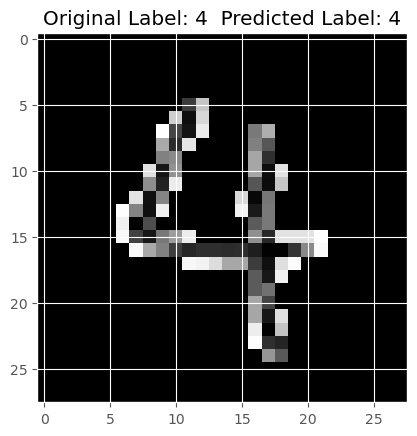

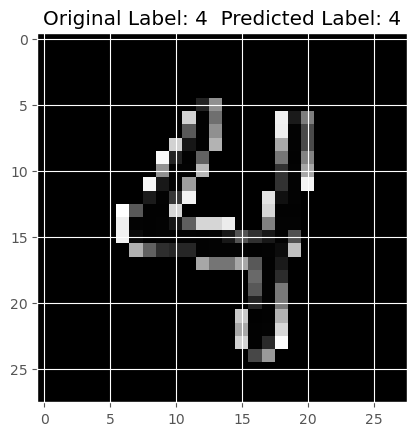

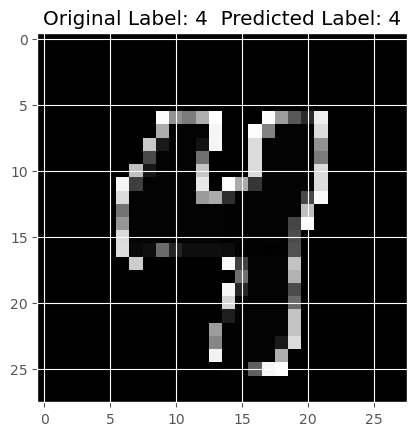

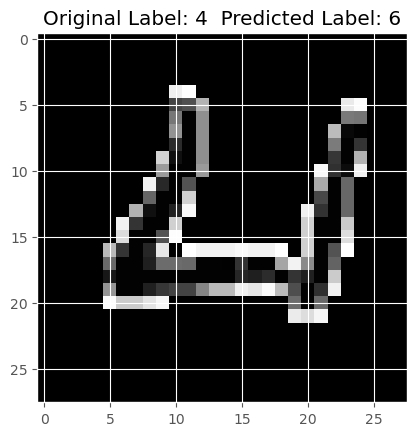

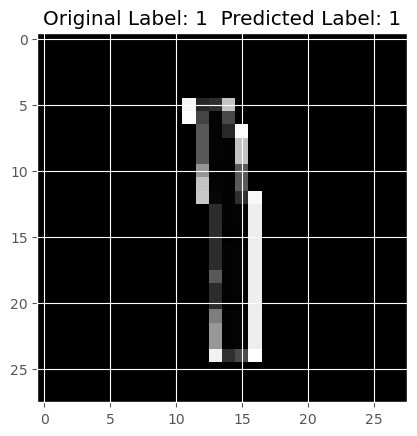

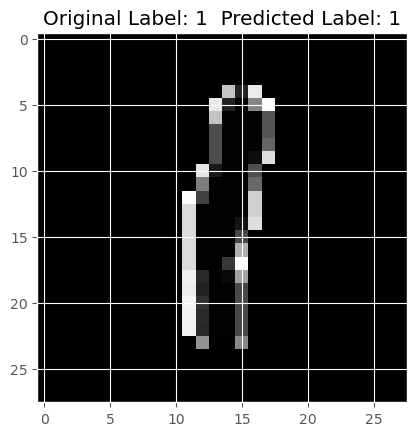

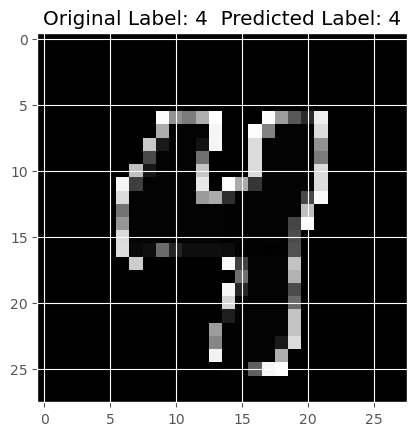

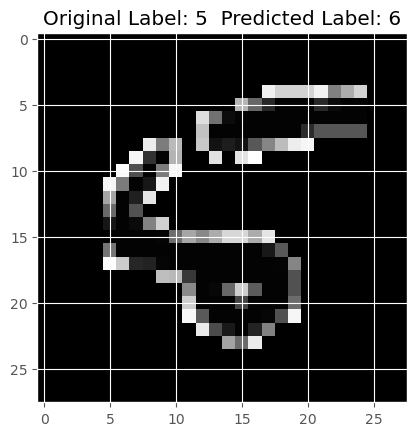

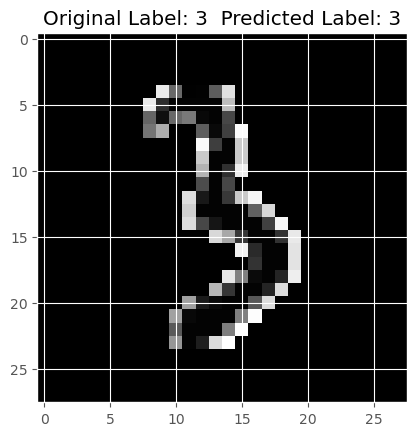

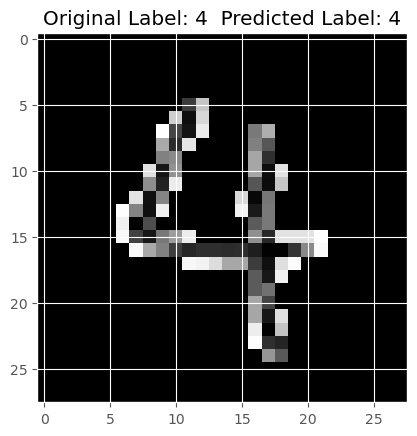

In [7]:
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

print('\nLoading MNIST Data...')
data = MNIST('./MNIST_Dataset_Loader/dataset/')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

# Features
X = train_img

# Labels
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Logistic Regression Classifier
print('\nLogistic Regression Classifier')
print('\nPickling the Classifier for Future Use...')
clf = LogisticRegression(max_iter=1000)  # Increase max_iter
clf.fit(X_train, y_train)

with open('MNIST_LogisticRegression.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_LogisticRegression.pickle', 'rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test, y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test, y_pred)

print('\nLogistic Regression Trained Classifier Confidence: ', confidence)
print('\nPredicted Values: ', y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ', accuracy)
print('\nConfusion Matrix: \n', conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels, test_labels_pred)

print('\nCreating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels, test_labels_pred)

print('\nPredicted Labels for Test Images: ', test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ', acc)
print('\nConfusion Matrix for Test Data: \n', conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1, 50, 20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i], test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()
